<a href="https://colab.research.google.com/github/helmouafik/PROJECTS/blob/main/MNIST_Helmouafik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# Chargement des données
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print('trainset:', X_train.shape)
print('testset:', X_test.shape)

# Normalisation des données
X_train = X_train / 255
X_test = X_test / 255

trainset: (60000, 28, 28)
testset: (10000, 28, 28)


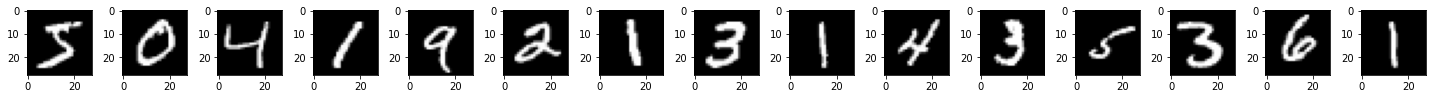

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=15, figsize=(20, 4))
for i in range(15):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

# Configuration des couches du réseau

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


In [8]:
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2262 - accuracy: 0.9335
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0964 - accuracy: 0.9704
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9789
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0517 - accuracy: 0.9832
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0416 - accuracy: 0.9865
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9884
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy: 0.9903
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9920


In [9]:
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.9760
Test accuracy: 0.9760000109672546


313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, '9')

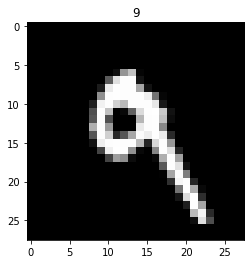

In [19]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)


plt.imshow(X_test[7],"gray")
plt.title(predictions[y_test[7]])